In [1]:
#!pip install python-docx
#!pip install aspose-words
#!pip install PyPDF2

In [2]:
#━━━━━━━━━❮Bibliotecas❯━━━━━━━━━
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
import datetime
import smtplib
import aspose.words as aw
import time
import sys
import os
import joblib
import json
import re
#━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from flask import Flask, request, render_template
#━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders
from mimetypes import add_type
from docx import Document
from PyPDF2 import PdfFileWriter, PdfFileReader
#from google.colab import files
#━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━

In [3]:
#━━━━━━━━━❮Verificação de email❯━━━━━━━━━
regex = '^[a-z0-9]+[\._]?[a-z0-9]+[@]\w+[.]\w{2,3}$'

while True:
    email =input('Digite o email do remetente: ')
    print('')
    
    cont = input('O email está correto? [S/N]').upper()
    if cont =='S':
        break
    
    
def check(email):  
    if(re.search(regex,email)):  
        print("Email Verificado com Sucesso")  
          
    else:  
        print("Email Invalido")   

check(email)
print(email)




Email Verificado com Sucesso
pythonmhb@gmail.com


In [4]:
#━━━━━━━━━❮initial data❯━━━━━━━━━
df =pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
#━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━


#━━━━❮dados a serem previstos❯━━━
df_val =df.iloc[:10]
#━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━

df_val.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#      treatment of data
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

df.drop('customerID', 1, inplace=True)

df.TotalCharges =pd.to_numeric(df.TotalCharges, errors='coerce')

#Verificando valor vazio
df[df.TotalCharges.isna()]

#tirando valores vazios (totalcharges)
df.dropna(subset=['TotalCharges'], inplace=True)

#df.head(5)

C:\Users\pytho\AppData\Local\Temp\ipykernel_1280\1952428054.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('customerID', 1, inplace=True)


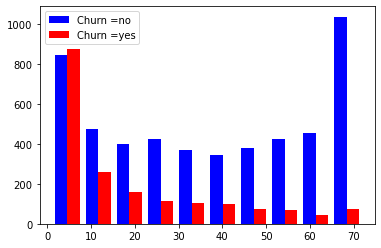

In [6]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#             Graficos
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━


#grafico analise de tenure
#    tenure--> quantidade de meses q o cliente ta na empresa

dfno =df[df.Churn=='No'].tenure
dfyes =df[df.Churn=='Yes'].tenure

plt.hist([dfno, dfyes], color=['blue','red'],label=['Churn =no', 'Churn =yes'])

plt.legend()

#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#        Salvando Relatório
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

plt.savefig("graph Churn-churn.png")

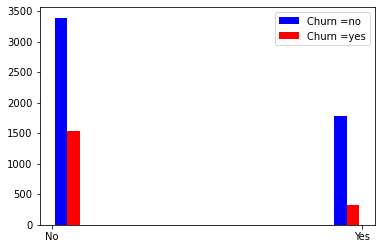

In [7]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#             Graficos
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

dfno =df[df.Churn=='No'].Dependents
dfyes =df[df.Churn=='Yes'].Dependents

plt.hist([dfno, dfyes], color=['blue','red'],label=['Churn =no', 'Churn =yes'])
plt.legend()

#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#        Salvando Relatório
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━



plt.savefig("graph churn-dep .png")

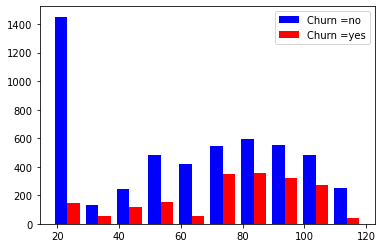

In [8]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#             Graficos
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

dfno =df[df.Churn=='No'].MonthlyCharges	
dfyes =df[df.Churn=='Yes'].MonthlyCharges	

plt.hist([dfno, dfyes], color=['blue','red'],label=['Churn =no', 'Churn =yes'])
plt.legend()


#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#        Salvando Relatório
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

plt.savefig("graph churn-MC.png")

No: 5163 Yes: 1869  % No: gender              100.0
SeniorCitizen       100.0
Partner             100.0
Dependents          100.0
tenure              100.0
PhoneService        100.0
MultipleLines       100.0
InternetService     100.0
OnlineSecurity      100.0
OnlineBackup        100.0
DeviceProtection    100.0
TechSupport         100.0
StreamingTV         100.0
StreamingMovies     100.0
Contract            100.0
PaperlessBilling    100.0
PaymentMethod       100.0
MonthlyCharges      100.0
TotalCharges        100.0
Churn               100.0
dtype: float64


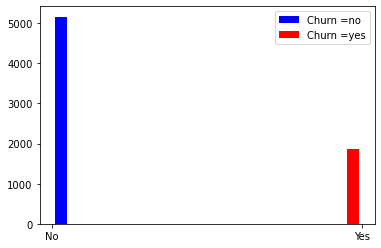

In [9]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#    balanceamento do dataset
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

dfno =df[df.Churn=='No'].Churn	
dfyes =df[df.Churn=='Yes'].Churn

total =dfno.count() +dfyes.count()
percent =round((df.count() /total)*100, 2)

print(f'No: {dfno.count()}',f'Yes: {dfyes.count()}', f' % No: {percent}')

#Plotagem

plt.hist([dfno, dfyes], color=['blue','red'],label=['Churn =no', 'Churn =yes'])
plt.legend()

In [10]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#    padronizando multiplanelines
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

for i in df:
  if df[i].dtypes =='object':
    print(f'{i} : {df[i].unique()}')
    
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [11]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#       Mudando para Números
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

dfnum =pd.get_dummies(data=df, columns=['gender', 'InternetService', 'Partner', 'Dependents', 'PhoneService',
                      'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                      'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                      'PaperlessBilling','PaymentMethod'])
dfnum.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_

In [12]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#           label encoder
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

le =LabelEncoder()
dfnum['Churn'] =le.fit_transform(dfnum['Churn'])
dfnum.Churn.sample(15)

4297    0
37      0
5895    0
5899    0
55      1
2746    0
860     0
1010    0
3259    0
4240    1
2824    0
1142    0
38      1
5831    1
3144    0
Name: Churn, dtype: int32

In [13]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#         Ajuste de Escala
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

scaler =MinMaxScaler()
dfnum[['tenure', 'MonthlyCharges', 'TotalCharges']] =scaler.fit_transform(dfnum[['tenure', 'MonthlyCharges','TotalCharges']])
#dfnum.sample(5)

In [14]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#     separar features e labels
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

features =dfnum.drop(['Churn'], 1)
label =dfnum['Churn']

C:\Users\pytho\AppData\Local\Temp\ipykernel_1280\3143173423.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features =dfnum.drop(['Churn'], 1)


In [15]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#             Validação
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

val =features.head(10)
val.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0.115423,0.001275,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0.464789,0.385075,0.215867,0,1,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,0.014085,0.354229,0.010310,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0.619718,0.239303,0.210241,0,1,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,0.014085,0.521891,0.015330,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [16]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#           Nova Feature
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

features =features.iloc[10:]
label =label.iloc[10:]

In [17]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#         Treino & Teste
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

X_train, X_test, y_train, y_test =train_test_split(features, label, test_size=20, random_state=42)


print(X_train.shape, y_train.shape)


model =Sequential([
    Dense(20, input_shape=(41,), activation ='relu'),
    Dense(52, activation ='relu'),
    Dense(1, activation ='sigmoid')
])

#parametro de execução
model.compile(optimizer ='adam',
              loss ='binary_crossentropy',
              metrics =['accuracy'])

(7002, 41) (7002,)


In [18]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#            Treinamento
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

model.fit(X_train, y_train, epochs =300)

Epoch 1/300
219/219 [==============================] - 4s 3ms/step - loss: 0.4815 - accuracy: 0.7561
Epoch 2/300
219/219 [==============================] - 1s 4ms/step - loss: 0.4258 - accuracy: 0.7986
Epoch 3/300
219/219 [==============================] - 1s 3ms/step - loss: 0.4203 - accuracy: 0.7998
Epoch 4/300
219/219 [==============================] - 1s 3ms/step - loss: 0.4183 - accuracy: 0.8028
Epoch 5/300
219/219 [==============================] - 1s 2ms/step - loss: 0.4155 - accuracy: 0.8021
Epoch 6/300
219/219 [==============================] - 1s 3ms/step - loss: 0.4150 - accuracy: 0.8019
Epoch 7/300
219/219 [==============================] - 1s 4ms/step - loss: 0.4161 - accuracy: 0.8041
Epoch 8/300
219/219 [==============================] - 1s 3ms/step - loss: 0.4131 - accuracy: 0.8053
Epoch 9/300
219/219 [==============================] - 1s 3ms/step - loss: 0.4121 - accuracy: 0.8072
Epoch 10/300
219/219 [==============================] - 1s 3ms/step - loss: 0.4102 - accura

In [19]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#            Predição
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

pred_val =model.predict(val)
print(pred_val)


y_pred =[]

for i in pred_val:
  if i>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

cliente =df_val['customerID']
real =df_val['Churn']
pred =list(pred_val.flatten())

df =pd.DataFrame({'cliente' :cliente, 'previsão' :pred, 'real' :real, 'churn' :y_pred})

display(df)

1/1 [==============================] - 0s 140ms/step
[[0.8165677 ]
 [0.00270709]
 [0.10375165]
 [0.00206169]
 [0.7593667 ]
 [0.9976126 ]
 [0.38838813]
 [0.5150589 ]
 [0.6456469 ]
 [0.07639358]]


,cliente,previsão,real,churn
0,7590-VHVEG,0.816568,No,1
1,5575-GNVDE,0.002707,No,0
2,3668-QPYBK,0.103752,Yes,0
3,7795-CFOCW,0.002062,No,0
4,9237-HQITU,0.759367,Yes,1
5,9305-CDSKC,0.997613,Yes,1
6,1452-KIOVK,0.388388,No,0
7,6713-OKOMC,0.515059,No,1
8,7892-POOKP,0.645647,Yes,1
9,6388-TABGU,0.076394,No,0


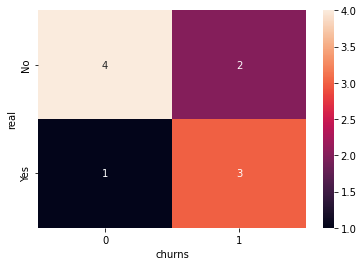

In [20]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#         Matriz de confusão
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

df =pd.DataFrame(df, columns=['real', 'churn'])
matrix_cnf =pd.crosstab(df['real'], df['churn'], rownames=['real'], colnames=['churns'])

sns.heatmap(matrix_cnf, annot=True).figure.savefig("matrix cnf.png")

In [21]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#        Arrumando Data
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

data =str(datetime.date.today())

dia =data[8:]
mes =data[5:7]
ano =data[:4]


relt ='Relatório Churn {}-{}-{}'.format(dia, mes,ano)

In [22]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#             Relatório
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━


#━━━━━━━━❮Abrindo Arquivo❯━━━━━━━━━
arquivo =Document()
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━


#━━━━━━━━━━━━━❮Titulo❯━━━━━━━━━━━━━
arquivo.add_heading("Relatório de Churn                {}/{}/{}".format(dia, mes,ano), 0)
arquivo.add_paragraph('')
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

#━━━━━━━━━━━━━❮Briefing❯━━━━━━━━━━━━━

arquivo.add_paragraph('Este relatório foi feito de forma automática e visa auxiliar a tomada de decisão em relação a área de vendas e marketing da empresa.')
arquivo.add_paragraph('                                                                    Documento realizado pelo software Ragnar, de autoria da SettLink')
arquivo.add_paragraph('')


arquivo.add_page_break()

#━━━━━━━━❮Análise Gráfica 01❯━━━━━━━━━
arquivo.add_paragraph('──────────────────────≪Análise Gráfica Inicial≫─────────────────────')
arquivo.add_paragraph('')

arquivo.add_paragraph('')
arquivo.add_paragraph('Segundo as nossas analises, o tempo de permanencia do clinete é crucial para a fidelização do cliene, pois quanto mais tempo ele fica na empresa, menor a chance de churn.')
arquivo.add_paragraph('*Gráfico citado abaixo*')


arquivo.add_picture("graph Churn-churn.png")

#━━━━━━━━━━━━━━━❮Análise Gráfica 02❯━━━━━━━━━━━━━━━━
arquivo.add_paragraph('')
arquivo.add_paragraph('É possível ver também que não faz diferença se o responsável pelo plano tem algum dependente.')
arquivo.add_paragraph('*Gráfico citado abaixo*')

arquivo.add_picture("graph churn-dep .png")

#━━━━━━━━━━━━━━━❮Análise Gráfica 03❯━━━━━━━━━━━━━━━━
arquivo.add_paragraph('')
arquivo.add_paragraph('Os clientes com planos de US$80 -- US$100, tendem a serem menor convertidos no longo prazo.')
arquivo.add_paragraph('*Gráfico citado abaixo*')

arquivo.add_picture("graph churn-MC.png")


#━━━━━━━━━━━━━━━❮Análise Gráfica 04❯━━━━━━━━━━━━━━━━
arquivo.add_paragraph('')
arquivo.add_paragraph('Considerando estes fatores, é possível entender que a empresa teria uma maior fidelização de clientes se oferecessem mais vantagens nos planos de US$80 -- US$100.')
arquivo.add_paragraph('Além disso, é muito importante melhorar as vantagens dos clientes logo no começo de sua experiência, pois é no começo que ocorre a maior perda de clientes da empresa')

arquivo.add_paragraph('*Gráfico citado abaixo*')

arquivo.add_picture("matrix cnf.png")







#━━━━━━━━❮Fechando Arquivo❯━━━━━━━━━
arquivo.save(f'{relt}.docx')

#files.download('{}.docx'.format(relt))
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━


doc = aw.Document(f'{relt}.docx')
doc.save(f"{relt}.pdf")




In [23]:
#━━━━━━━━━❮Fecha Arquivo❯━━━━━━━━━
def fechaarq():
    os.remove("graph Churn-churn.png")
    os.remove("graph churn-dep .png")
    os.remove("graph churn-MC.png")
    os.remove('matrix cnf.png')
    os.remove(f'{relt}.docx')
    os.remove(f'{relt}.pdf')
    os.remove(f'Secure_{relt}.pdf')

In [24]:
#━━━━━━❮Adicionando Segurança❯━━━━━━━
def secpdf(file, password):
    parser =PdfFileWriter()
    pdf =PdfFileReader(f"{relt}.pdf")
    for page in range(pdf.numPages):
        parser.addPage(pdf.getPage(page))
    parser.encrypt(password)
    
    with open(f'Secure_{relt}.pdf', 'wb') as f:
        parser.write(f)
        f.close()
    print(f'Secure_{relt} Created...')
    
if __name__ == "__main__":
    file =sys.argv[1]
    password = 'senha'
    secpdf(file, password)
    
        

Secure_Relatório Churn 19-10-2022 Created...


In [25]:
#━━━━━━━━❮envio do Email❯━━━━━━━━━
def enviar_email():
    time.sleep(1)
    body = f"""
    Segue o {relt}
    
    A SettLink agradece a preferência, conte conosco sobre qualquer duvida!
    """

    sender = 'settlinksp@gmail.com'
    password = 'jmolibocyyhmgqxv'
    receiver = email


    message = MIMEMultipart()
    message['From'] = sender
    message['To'] = receiver
    message['Subject'] = relt

    message.attach(MIMEText(body, 'plain'))

    pdfname = f'Secure_{relt}.pdf'


    binary_pdf = open(pdfname, 'rb')

    payload = MIMEBase('application', 'octate-stream', Name=pdfname)
    payload.set_payload((binary_pdf).read())

    encoders.encode_base64(payload)

    payload.add_header('Content-Decomposition', 'attachment', filename=pdfname)
    message.attach(payload)

    session = smtplib.SMTP('smtp.gmail.com', 587)

    session.starttls()

    session.login(sender, password)

    text = message.as_string()
    session.sendmail(sender, receiver, text)
    session.quit()
    print('200')
    time.sleep(1)
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

In [26]:
#━━━━━━❮Execução das funções❯━━━━━━━
enviar_email()
fechaarq()

200


In [27]:
#━━━━━━❮Salvando Modelo❯━━━━━━━
model.save('model')

INFO:tensorflow:Assets written to: model\assets
